In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [49]:
iris_df = pd.read_csv("IRIS.csv")

In [50]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [155]:
iris_df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

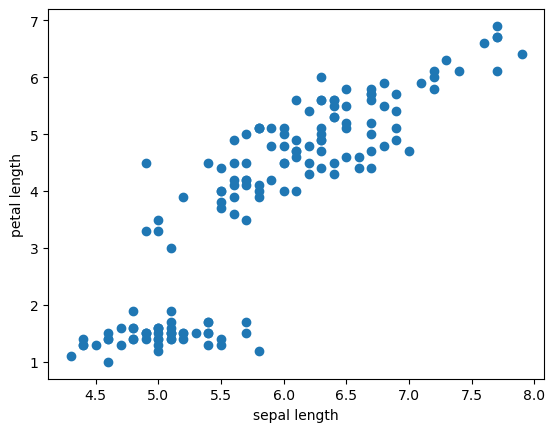

In [154]:
plt.scatter(x=iris_df['sepal_length'],y=iris_df['petal_length'])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

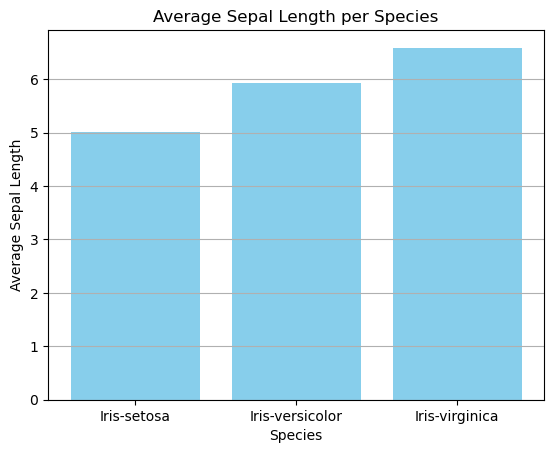

In [156]:
grouped = iris_df.groupby('species')['sepal_length'].mean()

plt.bar(grouped.index, grouped.values, color='skyblue')
plt.xlabel("Species")
plt.ylabel("Average Sepal Length")
plt.title("Average Sepal Length per Species")
plt.grid(axis='y')
plt.show()

In [52]:
iris_data = iris_df.drop_duplicates()

In [53]:
iris_tdf = iris_data.ffill()

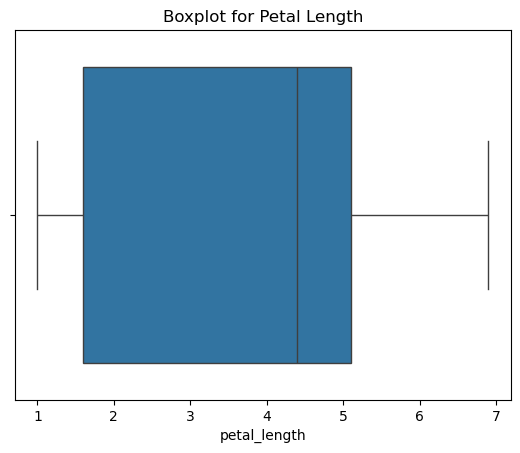

In [54]:
sns.boxplot(x=iris_tdf['petal_length'])
plt.title('Boxplot for Petal Length')
plt.show()

In [111]:
from scipy.stats import zscore

In [137]:
numeric_df = iris_tdf.select_dtypes(include='number')
z_scores = zscore(numeric_df)
z_df = pd.DataFrame(z_scores, columns=numeric_df.columns)
threshold = 3
outliers = (abs(z_df) > threshold)

filtered_outliers = iris_tdf[outliers.any(axis=1)]  # Use .any(axis=1), not .all(axis=1)

if filtered_outliers.empty:
    print("No Outliers")
else:
    print(filtered_outliers)

    sepal_length  sepal_width  petal_length  petal_width      species
15           5.7          4.4           1.5          0.4  Iris-setosa


In [138]:
iris_ttdf = iris_tdf.drop(filtered_outliers.index)

In [146]:
iris_ttdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  146 non-null    float64
 1   sepal_width   146 non-null    float64
 2   petal_length  146 non-null    float64
 3   petal_width   146 non-null    float64
 4   species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [139]:
iris_ttdf.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X = pd.DataFrame(iris_ttdf[['petal_length', 'sepal_length','sepal_width','petal_width']])
y = pd.Series(iris_ttdf.species)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle = True)

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [143]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9333333333333333


In [144]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333
